<a href="https://colab.research.google.com/github/angelazhao2552/stanford-datathon-team211/blob/main/SODP_Team_211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Read data

In [ ]:
university = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
university.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Wrangling

In [ ]:
university.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
def admit(x):
  if x >= 0.8:
    return 'high possibility'
  elif x >= 0.6:
    return 'normal performance'
  elif x >= 0.4:
    return 'unlikely'
  elif x >= 0.2:
    return 'very unlikely'

university['Admit'] = university.apply(lambda row: admit(row['Chance of Admit ']), axis=1)

In [ ]:
university['GPA']=university['CGPA'].apply(lambda cgpa: cgpa/10.0*4.0)

In [ ]:
university.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit,GPA
0,1,337,118,4,4.5,4.5,9.65,1,0.92,high possibility,3.860
1,2,324,107,4,4.0,4.5,8.87,1,0.76,normal performance,3.548
2,3,316,104,3,3.0,3.5,8.00,1,0.72,normal performance,3.200
3,4,322,110,3,3.5,2.5,8.67,1,0.80,high possibility,3.468
4,5,314,103,2,2.0,3.0,8.21,0,0.65,normal performance,3.284


# Plotting

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


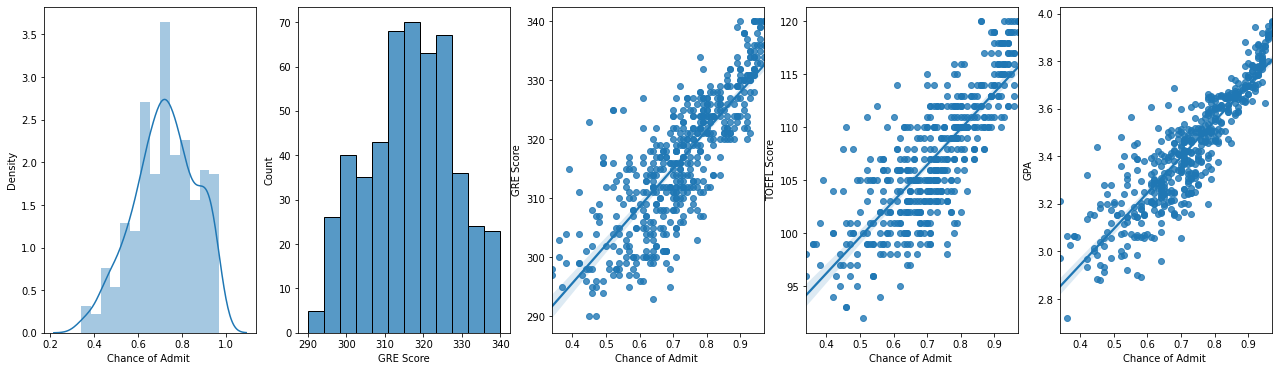

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))
ax1 = axes[0]
sns.distplot(university['Chance of Admit '], ax = ax1)
ax2 = axes[1]
sns.histplot(x='GRE Score', data=university, ax=ax2)
ax3 = axes[2]
sns.regplot(x='Chance of Admit ', y='GRE Score', data=university, ax = ax3)
ax4 = axes[3]
sns.regplot(x='Chance of Admit ', y='TOEFL Score', data=university, ax = ax4)
ax5 = axes[4]
sns.regplot(x='Chance of Admit ', y='GPA', data=university, ax = ax5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


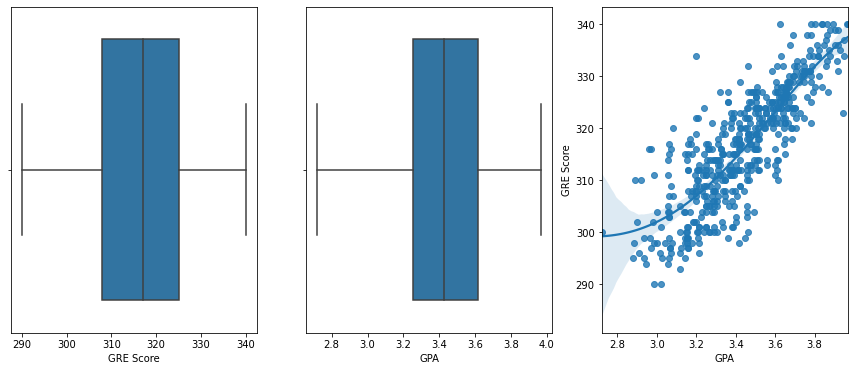

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax1 = axes[0]
sns.boxplot(university['GRE Score'], ax=ax1)
ax2 = axes[1]
sns.boxplot(university['GPA'], ax=ax2)
ax3 = axes[2]
sns.regplot(x=university['GPA'], y=university['GRE Score'], order=4, ax=ax3)

             TOEFL Score  GRE Score       SOP      LOR        GPA
TOEFL Score     1.000000   0.827200  0.644410  0.541563  0.810574
GRE Score       0.827200   1.000000  0.613498  0.524679  0.825878
SOP             0.644410   0.613498  1.000000  0.663707  0.712154
LOR             0.541563   0.524679  0.663707  1.000000  0.637469
GPA             0.810574   0.825878  0.712154  0.637469  1.000000


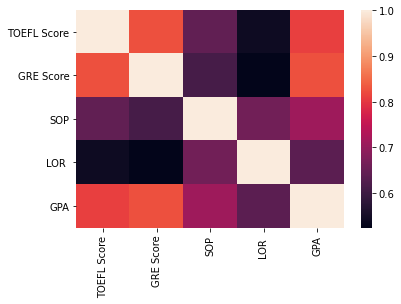

In [ ]:
corr = university[['TOEFL Score', 'GRE Score', 'SOP', 'LOR ', 'GPA']].corr()
print(corr)
sns.heatmap(corr, linecolor='white',xticklabels = corr.columns, yticklabels = corr.columns)

# Model training

In [ ]:
features = ['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'Research',
 'GPA']
target = "Admit"

In [ ]:
X = university[features]
y = university[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

### Logistic Regression

In [ ]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.81

In [ ]:
for i in range(len(features)):
  print(features[i] + ": " + str(model.coef_[0][i]))

GRE Score: 0.09616770006577893
TOEFL Score: 0.27150262195790387
University Rating: 0.41684715030877667
SOP: 0.4544244367932193
Research: 1.1646137359887645
GPA: 2.2955470170313537


In [ ]:
parameters = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 
              'max_iter':[100,125,150,200], 'multi_class':['auto','ovr','multinomial']}
logit = LogisticRegression()
clf = GridSearchCV(estimator=logit, param_grid=parameters, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)

clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


{'max_iter': 100, 'multi_class': 'auto', 'solver': 'newton-cg'}

### K Nearest Neighbor

In [ ]:
model = KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.78

In [ ]:
parameters = {'n_neighbors':[5,10,15,20,25], 'weights':['uniform','distance'], 
              'algorithm':['auto','ball_tree','kd_tree','brute'], 'p':[1,2]}
knn = KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=parameters, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)

clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

### Random Forest

In [ ]:
model = RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.83

In [ ]:
cross_val_score(model, X_train, y_train, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.8125, 0.8   , 0.8125, 0.7375, 0.8   ])

In [ ]:
parameters = {'n_estimators':[5,25,50,100,150,200,250], 'criterion':['gini','entropy'], 
              'max_depth':[5,10,15,20,25], 'max_features':['auto','sqrt','log2']}
forest = RandomForestClassifier(max_depth=5, max_features='sqrt')
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=10)
clf.fit(X_train, y_train)

clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

Display：

In [ ]:
gre = input('Enter your GRE score: ')
toefl = input('Enter your TOEFL score: ')
rating = input('Enter the rating of the university you apply for: ')
import ipywidgets as iw
from IPython.display import display
sop=iw.Dropdown(options=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], value=0, description='SOP: ')
print('Enter your Statement of Purpose score: ')
display(sop)
print('Do you have any research experience?')
research = iw.Dropdown(options=[0,1], value=0, description='research: ')
display(research)
gpa = input('Enter your gpa: ')

Enter your GRE score: 330
Enter your TOEFL score: 110
Enter the rating of the university you apply for: 4
Enter your Statement of Purpose score: 


Dropdown(description='SOP: ', options=(0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5), value=0)

Do you have any research experience?


Dropdown(description='research: ', options=(0, 1), value=0)

In [ ]:
input = [[gre, toefl, rating, sop.value, research.value, gpa]]
df = pd.DataFrame(input, columns=['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'Research',
 'GPA'])
print(model.predict(df))

In [ ]:
corr